In [2]:
import numpy as np

In [2]:
a = np.arange(100).reshape(10,10)
a

array([[ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9],
       [10, 11, 12, 13, 14, 15, 16, 17, 18, 19],
       [20, 21, 22, 23, 24, 25, 26, 27, 28, 29],
       [30, 31, 32, 33, 34, 35, 36, 37, 38, 39],
       [40, 41, 42, 43, 44, 45, 46, 47, 48, 49],
       [50, 51, 52, 53, 54, 55, 56, 57, 58, 59],
       [60, 61, 62, 63, 64, 65, 66, 67, 68, 69],
       [70, 71, 72, 73, 74, 75, 76, 77, 78, 79],
       [80, 81, 82, 83, 84, 85, 86, 87, 88, 89],
       [90, 91, 92, 93, 94, 95, 96, 97, 98, 99]])

# 차원에 관하여

1. split (h, v, d)
2. raval: view / flatten (copy)
3. r_, c_, s_

### 피처 셀렉션 방식 3가지 (참고)

필터방식, 렛 방식, 임베디드 방식

In [3]:
np.newaxis # output이 안나온다. None하고 똑같다.

In [4]:
a = np.array([1, 2, 3])
a[np.newaxis] # 차원을 하나 추가시킨다.

array([[1, 2, 3]])

In [5]:
a = np.array([1, 2, 3])
a[None] # 이렇게 해도 상관없다.

array([[1, 2, 3]])

새로운 연산자를 추가하는것 -> 연산자 오버로딩이라고 한다. 원래는 [None]이 기본이었는데, 사람들이 이해를 잘 못해가지고 np.newaxis라는 걸 새로 만들어 둔 것이다.

주로 4차원 텐서를 쓰게 되는데, (개수, input_shape, 채널) 이렇게 된다. 그런데 원래 이미지는 3차원이기 때문에 이를 4차원으로 변경하기 위해서, 이 newaxis를 추가하게 된다.

In [6]:
print(a.shape)
print(a[None].shape) # 제일 큰 곳부터 shape가 생긴다.

(3,)
(1, 3)


근데 어제 공백이 출력되는걸 봤는데, 그건 도대체 뭔가

In [7]:
b = np.array([[[1, 2], [3, 4]], [[1, 2], [3, 4]]])
b

array([[[1, 2],
        [3, 4]],

       [[1, 2],
        [3, 4]]])

In [8]:
b.shape

(2, 2, 2)

In [10]:
a[:, np.newaxis]
a[:, np.newaxis].shape

(3, 1)

In [11]:
x = np.arange(6).reshape(2,3)
x

array([[0, 1, 2],
       [3, 4, 5]])

In [12]:
x[np.newaxis].shape # 예측할 때, 좀 쓴다.

(1, 2, 3)

In [13]:
x[:,np.newaxis].shape

(2, 1, 3)

In [14]:
x[:, :, np.newaxis].shape # ...을 쓸 수도 있지만, 이것 쓰면 실수가 많아진다고 한다.

(2, 3, 1)

이렇게 새로운 차원이 추가가 된다.

머신러닝에서는 SVM 빼고는 차원 늘리는 일이 거의 없다. 차원의 저주 때문에.

In [15]:
x

array([[0, 1, 2],
       [3, 4, 5]])

In [16]:
np.expand_dims(x, axis = 0)
print(np.expand_dims(x, axis = 0).shape) # 이렇게도 쓸 수 있다. 근데 newaxis가 더 짧아서 그거 쓰는 사람도 많다.

(1, 2, 3)


## 브이스택 알바!!
## 브이스택 알바!!
## 브이스택 알바!!

In [17]:
np.vstack([x, x]) # np.r_와 동일하다.

array([[0, 1, 2],
       [3, 4, 5],
       [0, 1, 2],
       [3, 4, 5]])

In [18]:
np.r_[x,x] # vstack하고 비슷하지만, row 언더바라고 한다.

array([[0, 1, 2],
       [3, 4, 5],
       [0, 1, 2],
       [3, 4, 5]])

In [19]:
np.c_[x, x] # colunm 언더바이다.

array([[0, 1, 2, 0, 1, 2],
       [3, 4, 5, 3, 4, 5]])

In [20]:
y  = [1, 2, 3, 4, 5]
y[1:3] # y[slice(1, 3)] 이렇게도 쓸 수 있다.

[2, 3]

In [21]:
np.s_[x,x] # 넘파이에서는 이렇게 붙이기도 한다.

(array([[0, 1, 2],
        [3, 4, 5]]), array([[0, 1, 2],
        [3, 4, 5]]))

이렇게 연산자를 만들어서 쓰는 이유는 많이 쓰이기 때문이다. 

참고: [ ]를 인덱서라고 한다.

In [22]:
x = np.arange(6).reshape(2, 3)
x[np.newaxis]

array([[[0, 1, 2],
        [3, 4, 5]]])

In [23]:
np.dstack([x,x]) # 나란히 쌓고 위에서 본다고 생각하면 된다.

array([[[0, 0],
        [1, 1],
        [2, 2]],

       [[3, 3],
        [4, 4],
        [5, 5]]])

In [24]:
np.dstack([x,x]).shape

(2, 3, 2)

In [25]:
np.append(x, x, axis = 0) # 이렇게 추가하는 것도 가능하다.

array([[0, 1, 2],
       [3, 4, 5],
       [0, 1, 2],
       [3, 4, 5]])

항상 벡터 연산은 모양 맞춰주는게 기본이기 때문에, 이렇게 많은 기법들이 있다.

# 트레인 테스트 나누기

In [27]:
from sklearn.model_selection import train_test_split # 우리는 안 쓴다.
import inspect

print(inspect.getsource(train_test_split))

def train_test_split(*arrays, **options):
    """Split arrays or matrices into random train and test subsets

    Quick utility that wraps input validation and
    ``next(ShuffleSplit().split(X, y))`` and application to input data
    into a single call for splitting (and optionally subsampling) data in a
    oneliner.

    Read more in the :ref:`User Guide <cross_validation>`.

    Parameters
    ----------
    *arrays : sequence of indexables with same length / shape[0]
        Allowed inputs are lists, numpy arrays, scipy-sparse
        matrices or pandas dataframes.

    test_size : float, int or None, optional (default=None)
        If float, should be between 0.0 and 1.0 and represent the proportion
        of the dataset to include in the test split. If int, represents the
        absolute number of test samples. If None, the value is set to the
        complement of the train size. If ``train_size`` is also None, it will
        be set to 0.25.

    train_size : float, int, or 

# 축바꾸기

In [28]:
x

array([[0, 1, 2],
       [3, 4, 5]])

In [29]:
np.transpose(x)

array([[0, 3],
       [1, 4],
       [2, 5]])

In [62]:
np.swapaxes(x, 0, 1) # transpose는 다차원 개념이라서 더 많은 축들을 바꿀 수 있다.

array([[0, 3],
       [1, 4],
       [2, 5]])

In [63]:
np.moveaxis(x, 0, 1) # transpose와 비슷하다 이것도.

array([[0, 3],
       [1, 4],
       [2, 5]])

이런 것에도 다 스트라이드 개념이 들어가서 빠르게 처리된다.

# Descriptive vs Imperative

 - Descriptive: 함수형 패러다임. 텐서플로 세션 방식 (포기)
 - Imperative: 파이토치.

# 벡터라이즈

싹 다 어레이로 실행한다.

In [30]:
@np.vectorize
def x(a, b):
    return a+b # 이걸 내부적으로 벡터라이즈 방식으로 처리한다. 그래서 데코레이터로 처리한다.

In [31]:
a = np.array([1, 2])
b = np.array([3, 4])

x(a, b)

array([4, 6])

# 이미지를 처리하는 2가지 방식

1. 비트맵 방식 (픽셀방식): 점으로 다 표현한다.
2. 벡터라이즈 방식 (파워포인트)

 - 비트맵 방식은 어레이로 처리한다.
 - RGB는 합치면 합칠수록 하앟게 된다. 빛의 방식으로 표현하기 때문. 그레이 스케일은 강도만 표현하면 되기 때문에 0-1사이로 표현한다.

# 이미지 표현방식

 - (h, w): gray scale
 - channel first 방식: channel, h, w
 - channle last 방식(RGB): h, w, channel
 
CNN 옛날 논문은 채널퍼스트가 아주 많다. 텐서플로는 채널 라스트이다. 최신 기법들은 채널라스트가 많다.

In [27]:
from tensorflow.keras.datasets import mnist

In [28]:
dir(mnist) # 객체에 쓰는 명령어인데, package에 주목. 이게 있으면 모듈이라는 뜻이다.

['__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 '_sys',
 'load_data']

In [29]:
type(mnist) # module (하나의 파일) 즉, 모듈도 객체로 만들어 둔 것이다.

module

In [30]:
(train_input, train_label), (test_input, test_label) = mnist.load_data()

In [36]:
print('train_input:', train_input.shape) # 개수, 가로, 세로
print('train_label:', train_label.shape)
print('test_input:', test_input.shape)
print('test_label:', test_label.shape)

train_input: (60000, 28, 28)
train_label: (60000,)
test_input: (10000, 28, 28)
test_label: (10000,)


CNN은 dimension 정보가 필요하기 때문에, 반드시 차원을 하나 추가해줘야 한다.

In [31]:
train_input[0,:,:] # train_input[0,...], train_input[0] 동일하다.

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

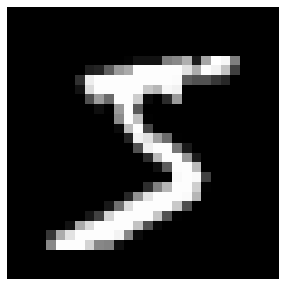

In [33]:
import  matplotlib.pyplot as plt
plt.figure(figsize = (5, 5))
plt.imshow(train_input[0], cmap='gray') # 값이 크면 클수록 밝으니까 이게 맞다.
plt.axis(False)
plt.show()

In [40]:
np.matrix([[1, 2, ], [3, 4, ]]) # 매트릭스 기반도 있다. matlab이라는 프레임워크는 기본 프레임워크가 매트릭스다.
# R은 벡터기반이다. 넘파이도 벡터를 더 좋아한다. 넘파이는 두개 다 지원한다.

matrix([[1, 2],
        [3, 4]])

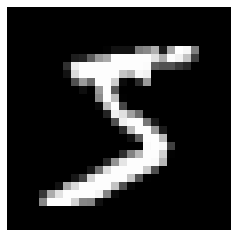

In [34]:
plt.matshow(train_input[0], cmap = 'gray') # 이것도 가능하긴 하다.
plt.axis(False)
plt.show()

인공지능은 돈이 많이 들어간다. 전통적인 방식도 배울건데, 이런 건 굳이 인공지능기법으로 할 필요 없기 때문에 그냥 전통적인 방법으로 배우는 것이다. 그럼에도 전통저인 방식을 배우는 이유는, 인공지능에 들어가기 전에 전처리하기 때문이다.

In [35]:
import PIL # 가장 많이 쓰는 패키지 중 하나이다. 케라스에 이 기능이 들어가있다.
# 컴포지션 방식으로 기똥차게 만들어놨다. 자동화시키기에도 아주 좋다.

In [36]:
dir(PIL) # sorting해서 Ascending 방식이기 때문에, 대문자가 먼저 나온다.

['Image',
 'ImageEnhance',
 'ImageFilter',
 'ImageMode',
 'ImageStat',
 'PILLOW_VERSION',
 'TiffTags',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 '__version__',
 '_binary',
 '_imaging',
 '_plugins',
 '_util']

In [38]:
from PIL import Image
type(Image) # module

module

In [39]:
dir(Image) # 싹다 대문자인 애는 상수이다.
# open같은 애들은 함수이다.

['ADAPTIVE',
 'AFFINE',
 'ANTIALIAS',
 'BICUBIC',
 'BILINEAR',
 'BOX',
 'CONTAINER',
 'CUBIC',
 'Callable',
 'DECODERS',
 'DEFAULT_STRATEGY',
 'DecompressionBombError',
 'DecompressionBombWarning',
 'ENCODERS',
 'EXTENSION',
 'EXTENT',
 'Exif',
 'FASTOCTREE',
 'FILTERED',
 'FIXED',
 'FLIP_LEFT_RIGHT',
 'FLIP_TOP_BOTTOM',
 'FLOYDSTEINBERG',
 'HAMMING',
 'HAS_PATHLIB',
 'HUFFMAN_ONLY',
 'ID',
 'Image',
 'ImageMode',
 'ImagePointHandler',
 'ImageTransformHandler',
 'LANCZOS',
 'LIBIMAGEQUANT',
 'LINEAR',
 'MAXCOVERAGE',
 'MAX_IMAGE_PIXELS',
 'MEDIANCUT',
 'MESH',
 'MIME',
 'MODES',
 'MutableMapping',
 'NEAREST',
 'NONE',
 'NORMAL',
 'OPEN',
 'ORDERED',
 'PERSPECTIVE',
 'PILLOW_VERSION',
 'Path',
 'QUAD',
 'RASTERIZE',
 'RLE',
 'ROTATE_180',
 'ROTATE_270',
 'ROTATE_90',
 'SAVE',
 'SAVE_ALL',
 'SEQUENCE',
 'TRANSPOSE',
 'TRANSVERSE',
 'TiffTags',
 'USE_CFFI_ACCESS',
 'WEB',
 '_E',
 '_ENDIAN',
 '_MAPMODES',
 '_MODEINFO',
 '_MODE_CONV',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',

In [44]:
%%writefile sun.txt
asdfasdfasdf
asdfsdffff
sefsffaf

Overwriting sun.txt


### 파이썬 open

In [118]:
with open('sun.txt') as f: # 파이썬은 텍스트형태와 바이너리 형태를 기본적으로 불러올 수 있다.
    pass

In [45]:
f = open('sun.txt') # 경로, 이름, 확장자가 3요소이다. 경로가 없으면 현재 디렉토리를 가리킨다.

In [46]:
dir(f) # __enter__, __exit__가 중요하다.

['_CHUNK_SIZE',
 '__class__',
 '__del__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__enter__',
 '__eq__',
 '__exit__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__iter__',
 '__le__',
 '__lt__',
 '__ne__',
 '__new__',
 '__next__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '_checkClosed',
 '_checkReadable',
 '_checkSeekable',
 '_checkWritable',
 '_finalizing',
 'buffer',
 'close',
 'closed',
 'detach',
 'encoding',
 'errors',
 'fileno',
 'flush',
 'isatty',
 'line_buffering',
 'mode',
 'name',
 'newlines',
 'read',
 'readable',
 'readline',
 'readlines',
 'reconfigure',
 'seek',
 'seekable',
 'tell',
 'truncate',
 'writable',
 'write',
 'write_through',
 'writelines']

In [47]:
next(f) # 이터레이터, 제너레이터 개념이 튀어나온다.

'asdfasdfasdf\n'

오픈하면 항상 클로즈 해줘야 한다. 안 그러면 메모리 뻑난다. 그래서 with 구문을 써주는거다.

이런걸 컨텍스트 매니저라고 한다.

In [41]:
with open('sun.txt') as f: # __enter__가 실행, 이건 또 할당의 개념이다. 문은 문끼리 중첩이 안되지만, as 구문으로 할당할 수 있다.
    pass # __exit__ 이 실행
# 자동으로 파일을 열고 닫아주기 때문에 좋다.

<_io.TextIOWrapper name='sun.txt' mode='r' encoding='cp949'>

이 f는 with를 벗어나도 유지가 된다. for문 밖에서 변수가 살아남는 것과 동일하다. (컴프리헨션은 죽는다)

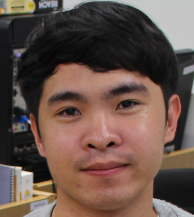

In [49]:
im = Image.open(fp = 'C:/Users/white/OneDrive/사진/카메라 앨범/꼬마돌.png')
im # 이미지가 튀어나온다.

In [126]:
type(im)
dir(im)

['_Image__transformer',
 '_PngImageFile__idat',
 '_PngImageFile__prepare_idat',
 '__array_interface__',
 '__class__',
 '__copy__',
 '__del__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__enter__',
 '__eq__',
 '__exit__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_close_exclusive_fp_after_loading',
 '_copy',
 '_crop',
 '_dump',
 '_ensure_mutable',
 '_exclusive_fp',
 '_exif',
 '_expand',
 '_getexif',
 '_min_frame',
 '_new',
 '_open',
 '_repr_png_',
 '_seek_check',
 '_size',
 '_text',
 'alpha_composite',
 'category',
 'close',
 'convert',
 'copy',
 'crop',
 'custom_mimetype',
 'decoderconfig',
 'decodermaxblock',
 'draft',
 'effect_spread',
 'encoderconfig',
 'encoderinfo',
 'entropy',
 'filenam

In [129]:
import inspect

print(inspect.getsource(im.__exit__)) # repr 때문에 print를 썼다.

    def __exit__(self, *args):
        if hasattr(self, "fp") and getattr(self, "_exclusive_fp", False):
            if hasattr(self, "_close__fp"):
                self._close__fp()
            if self.fp:
                self.fp.close()
        self.fp = None



In [130]:
f = open('sun.txt', 'w')
f.close()
f.write('111') # 닫으면 조작을 못 한다. 우리는 편의상 안 닫아준다.

ValueError: I/O operation on closed file.

In [52]:
dir(Image)
# __array__interface__ -> 쉽게 넘파이로 변화시킬 수 있는 인터페이스가 있다는 뜻이다.
# 

['ADAPTIVE',
 'AFFINE',
 'ANTIALIAS',
 'BICUBIC',
 'BILINEAR',
 'BOX',
 'CONTAINER',
 'CUBIC',
 'Callable',
 'DECODERS',
 'DEFAULT_STRATEGY',
 'DecompressionBombError',
 'DecompressionBombWarning',
 'ENCODERS',
 'EXTENSION',
 'EXTENT',
 'Exif',
 'FASTOCTREE',
 'FILTERED',
 'FIXED',
 'FLIP_LEFT_RIGHT',
 'FLIP_TOP_BOTTOM',
 'FLOYDSTEINBERG',
 'HAMMING',
 'HAS_PATHLIB',
 'HUFFMAN_ONLY',
 'ID',
 'Image',
 'ImageMode',
 'ImagePointHandler',
 'ImageTransformHandler',
 'LANCZOS',
 'LIBIMAGEQUANT',
 'LINEAR',
 'MAXCOVERAGE',
 'MAX_IMAGE_PIXELS',
 'MEDIANCUT',
 'MESH',
 'MIME',
 'MODES',
 'MutableMapping',
 'NEAREST',
 'NONE',
 'NORMAL',
 'OPEN',
 'ORDERED',
 'PERSPECTIVE',
 'PILLOW_VERSION',
 'Path',
 'QUAD',
 'RASTERIZE',
 'RLE',
 'ROTATE_180',
 'ROTATE_270',
 'ROTATE_90',
 'SAVE',
 'SAVE_ALL',
 'SEQUENCE',
 'TRANSPOSE',
 'TRANSVERSE',
 'TiffTags',
 'USE_CFFI_ACCESS',
 'WEB',
 '_E',
 '_ENDIAN',
 '_MAPMODES',
 '_MODEINFO',
 '_MODE_CONV',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',

In [50]:
print(im.format)
print(im.width)
print(im.height)

PNG
194
217


In [ ]:
im.save() # 이걸 통해 포맷을 변경할 수 있다.

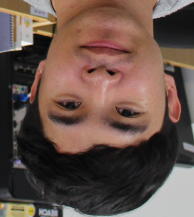

In [135]:
im.transpose(Image.FLIP_TOP_BOTTOM) # 0부터 6까지 할당할 수 있다.

In [139]:
Image.FLIP_TOP_BOTTOM # 다 대문자니까 상수다.

1